# METEHAN AYHAN - E-Mail Ham or Spam

Bu projede Turkcell'e gönderilen mesajların spam olup olmadığını bilen bir classification modeli geliştireceğiz. Ayrıca veri görselleştirmesi ve birkaç konu daha..

In [3]:
import pandas as pd

In [4]:
df=pd.read_csv('spam.csv',encoding='iso-8859-1')

In [5]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [6]:
import neattext as nt

In [7]:
df.shape

(5572, 5)

In [8]:
df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1,inplace=True)

In [9]:
df


,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [10]:
df.columns=['class','text']

In [11]:
df.head()

,class,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
hepsi=' '.join(df['text']) #text sütunundaki bütün satırları birleştirir.

In [13]:
sent=nt.TextFrame(hepsi)

In [14]:
sent.describe()

Key      Value          
Length  : 451993         
vowels  : 123893         
consonants: 203282         
stopwords: 36082          
punctuations: 22903          
special_char: 23446          
tokens(whitespace): 86335          
tokens(words): 90106          


In [15]:
sent.length

451993

In [16]:
sent.head(20) #ilk 20 karakter

'Go until jurong poin'

In [17]:
sent.tail()

' name'

In [18]:
sent.count_vowels()

{'a': 25248, 'e': 34934, 'i': 22439, 'o': 28962, 'u': 12310}

In [19]:
sent.count_stopwords() 

{'go': 262,
 'until': 27,
 'only': 183,
 'in': 855,
 'there': 135,
 'a': 1419,
 'to': 2226,
 'may': 43,
 'say': 80,
 'so': 423,
 'already': 48,
 'then': 205,
 'i': 2208,
 "don't": 134,
 'he': 180,
 'around': 53,
 'here': 79,
 'though': 16,
 "it's": 96,
 'been': 128,
 'now': 247,
 'and': 967,
 'no': 257,
 'some': 118,
 'you': 1917,
 'up': 262,
 'for': 697,
 'it': 465,
 'even': 61,
 'my': 751,
 'is': 862,
 'not': 404,
 'with': 377,
 'they': 124,
 'me': 605,
 'as': 176,
 'per': 56,
 'your': 676,
 'has': 115,
 'all': 259,
 'have': 568,
 'call': 557,
 'had': 100,
 'or': 414,
 'the': 1317,
 'on': 520,
 'be': 375,
 'about': 156,
 'this': 312,
 'enough': 22,
 'six': 4,
 'from': 277,
 'won': 64,
 'our': 142,
 'take': 124,
 'will': 374,
 'at': 398,
 'next': 60,
 'how': 253,
 'his': 57,
 'make': 101,
 'if': 378,
 'its': 207,
 'that': 468,
 'first': 50,
 'when': 282,
 'down': 48,
 'can': 385,
 'just': 363,
 'myself': 9,
 'really': 80,
 'always': 54,
 'did': 115,
 'are': 485,
 'an': 112,
 'over': 5

In [20]:
sent.count_consonants()

{'b': 5310,
 'c': 8876,
 'd': 11275,
 'f': 5745,
 'g': 8284,
 'h': 14204,
 'j': 935,
 'k': 4533,
 'l': 15757,
 'm': 10573,
 'n': 21738,
 'p': 6811,
 'q': 236,
 'r': 17738,
 's': 18898,
 't': 27921,
 'v': 3504,
 'w': 8462,
 'x': 1586,
 'y': 10396,
 'z': 500}

In [21]:
sent.readability() #okuyucu kitlesi

{'automated readability': 6.9861830850031055,
 'description': '12-13 years (Seventh Grade)'}

In [22]:
import nltk
nltk.download('gutenberg')

[nltk_data] Downloading package gutenberg to
[nltk_data]     C:\Users\metehan\AppData\Roaming\nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!


True

In [23]:
nltk.corpus.gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [24]:
seyhbir=nltk.corpus.gutenberg.raw('shakespeare-macbeth.txt')

In [284]:
#seyhbir

In [26]:
seyh=nt.TextFrame(seyhbir)

In [27]:
seyh.describe()

Key      Value          
Length  : 100351         
vowels  : 29039          
consonants: 46278          
stopwords: 7895           
punctuations: 4789           
special_char: 4789           
tokens(whitespace): 17741          
tokens(words): 18353          


In [28]:
seyh.readability()

{'automated readability': 13.40177050724963,
 'description': '18-24 years (College student)'}

In [29]:
import seaborn as sns

In [30]:
df.sample()

,class,text
1798,ham,That one week leave i put know that time. Why.


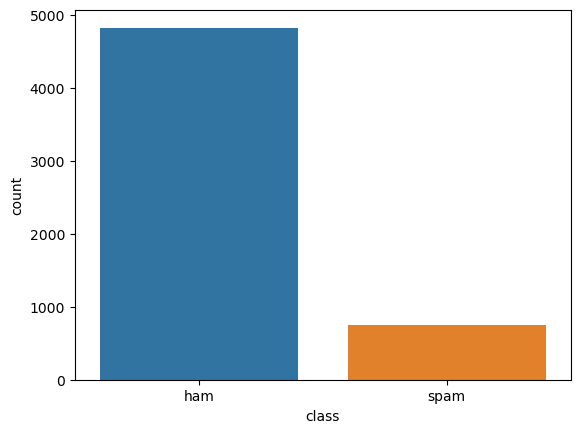

In [31]:
sns.countplot(x=df['class'],hue=df['class']);

In [32]:
# imbalanced Dataset

In [33]:
df['class'].value_counts()

class
ham     4825
spam     747
Name: count, dtype: int64

In [34]:
#from imblearn.over_sampling import SMOTE
#x,y=SMOTE().fit_resample(x,y)               sayısal olmadığı için kullanamayız.

In [35]:
df['text']=df['text'].str.lower()
df['text']=df['text'].str.replace('[^\w\s]','',regex=True)
df['text']=df['text'].str.replace('\d+','',regex=True)
df['text']=df['text'].str.replace('\n','',regex=True)
df['text']=df['text'].str.replace('\r','',regex=True)

<>:2: SyntaxWarning: invalid escape sequence '\w'
<>:3: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\w'
<>:3: SyntaxWarning: invalid escape sequence '\d'
C:\Users\metehan\AppData\Local\Temp\ipykernel_12604\3394191014.py:2: SyntaxWarning: invalid escape sequence '\w'
  df['text']=df['text'].str.replace('[^\w\s]','',regex=True)
C:\Users\metehan\AppData\Local\Temp\ipykernel_12604\3394191014.py:3: SyntaxWarning: invalid escape sequence '\d'
  df['text']=df['text'].str.replace('\d+','',regex=True)


In [36]:
x=df['text']
y=df['class']

In [37]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [38]:
from sklearn.ensemble import RandomForestClassifier

In [39]:
from sklearn.pipeline import Pipeline

In [40]:
clf=Pipeline([('tfidf',TfidfVectorizer()),('classifier',RandomForestClassifier())])

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
x_train, x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=42)

In [43]:
clf.fit(x_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('classifier', RandomForestClassifier())])

In [44]:
y_pred=clf.predict(x_test)

In [45]:
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix

In [46]:
accuracy_score(y_test,y_pred)

0.9730941704035875

In [47]:
confusion_matrix(y_test,y_pred)

array([[965,   0],
       [ 30, 120]], dtype=int64)

In [48]:
from sklearn.svm import SVC

In [49]:
svm=Pipeline([('tfidf',TfidfVectorizer()),('classifier',SVC())])

In [50]:
svm.fit(x_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('classifier', SVC())])

In [51]:
y_pred=svm.predict(x_test)

In [52]:
accuracy_score(y_test,y_pred)

0.979372197309417

<Axes: >

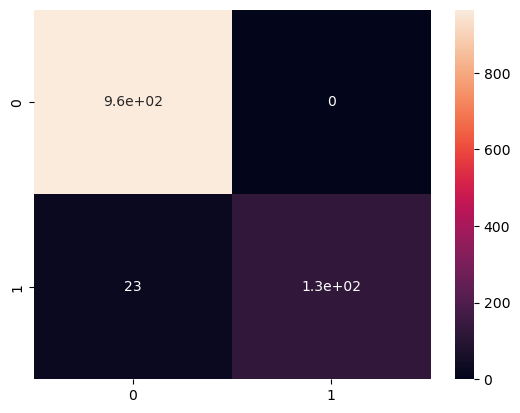

In [53]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)

In [54]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99       965
        spam       1.00      0.85      0.92       150

    accuracy                           0.98      1115
   macro avg       0.99      0.92      0.95      1115
weighted avg       0.98      0.98      0.98      1115



In [55]:
test1=['Hello you are learning Natural Language Processing']
test2=['Congrulations, you won a lottary ticket.To claim call 1-800-899-9999']
test3=['Click here to claim your $1 million lottary']

In [56]:
print(clf.predict(test1))

['ham']


In [57]:
print(clf.predict(test2))

['spam']


In [58]:
print(clf.predict(test3))

['ham']


In [59]:
print(svm.predict(test1))
print(svm.predict(test2))
print(svm.predict(test3))

['ham']
['spam']
['spam']


In [60]:
df['text'][1213]

'yeah probably but not sure ilol let u know but personally i wuldnt bother then again if ur goin to then i mite as well'

In [61]:
svm.predict([df['text'][1213]])

array(['ham'], dtype=object)

In [62]:
747/5572

0.13406317300789664

In [63]:
ham=df[df['class']=='ham']
spam=df[df['class']=='spam']

In [64]:
#spam sayısı ham sayısına göre çok az veri çok dengesiz.. bu yüzden sentetik data üretmeliyiz.

In [65]:
# Data augmentation - Var olan datadan yeni datalar oluşturma
# Synthetic Data

In [66]:
#wordclaud oluşturma

In [67]:
#pip install wordcloud

In [68]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [282]:
#' '.join(ham['text'])

In [70]:
WordCloud(' '.join(ham['text']))

In [71]:
def wc(data,color):
    plt.figure(figsize=(10,10))
    mask=np.array(Image.open('cloud.png'))
    wc=WordCloud(background_color=color,stopwords=STOPWORDS)
    wc.generate(' '.join(data))
    plt.imshow(wc)
    plt.axis('off')

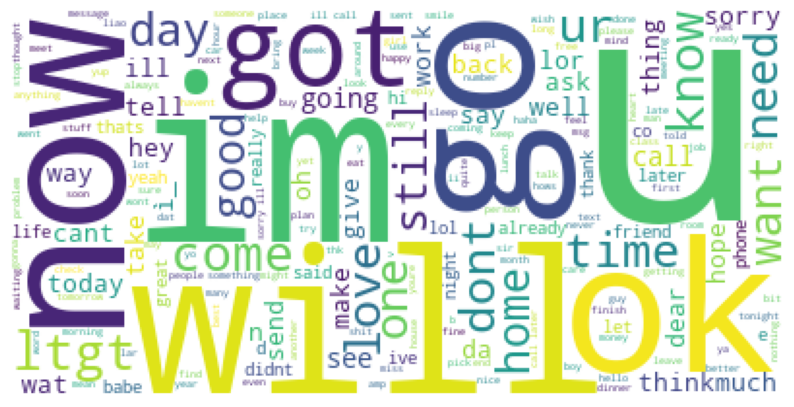

In [72]:
wc(ham['text'],'white')

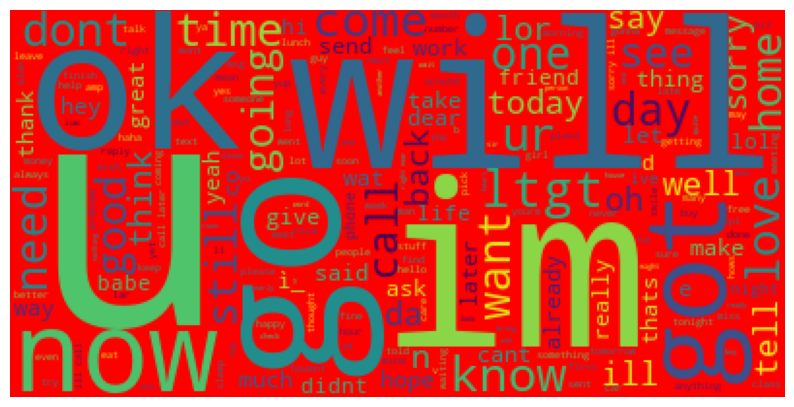

In [73]:
wc(ham['text'],'red')

In [74]:
spam=spam.sample(ham.shape[0], replace=True)

In [75]:
ham.shape, spam.shape

((4825, 2), (4825, 2))

In [76]:
data=pd.concat([ham,spam],ignore_index=True)

In [77]:
data.shape

(9650, 2)

In [78]:
data.head()

,class,text
0,ham,go until jurong point crazy available only in ...
1,ham,ok lar joking wif u oni
2,ham,u dun say so early hor u c already then say
3,ham,nah i dont think he goes to usf he lives aroun...
4,ham,even my brother is not like to speak with me t...


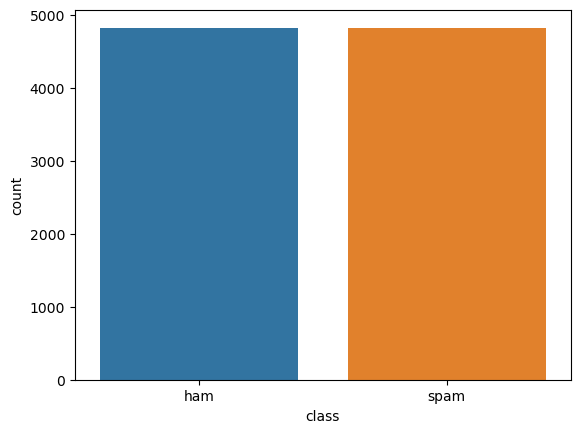

In [79]:
sns.countplot(x=data['class'],hue=data['class']);

In [80]:
x_train, x_test,y_train,y_test=train_test_split(data['text'],data['class'],test_size=.20,random_state=42)

In [81]:
clf=Pipeline([('tfidf',TfidfVectorizer()),('classifier',RandomForestClassifier())])

In [82]:
clf.fit(x_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('classifier', RandomForestClassifier())])

In [83]:
y_pred=clf.predict(x_test)
accuracy_score(y_test,y_pred)

0.9989637305699481

In [171]:
# Sentiment Analysis #pozitif mi negatif mi?

In [173]:
from textblob import TextBlob

In [203]:
text='Metehan loves hard working'
text2='I hate you!'

In [205]:
blob=TextBlob(text2)

In [207]:
blob.sentiment.polarity

-1.0

In [209]:
blob.sentiment.subjectivity

0.9

In [213]:
#pip install spacy

In [232]:
#!python -m spacy download en_core_web_md

In [228]:
#pip install -U spacy


In [230]:
#pip install -U pydantic


In [225]:
import spacy

+ Tokenization
+ Named Entity Recognition
+ Topic Modelling
+ PoS tagging
+ Lemma Stemma

In [234]:
nlp= spacy.load(name='en_core_web_md')

In [236]:
s1='''If the time has come to set sail,
A ship departs this port for the unknown.

It departs in silence, as if it had no passengers;
Neither a handkerchief nor an arm is waved in its departure.'''

In [240]:
print(s1.split())

['If', 'the', 'time', 'has', 'come', 'to', 'set', 'sail,', 'A', 'ship', 'departs', 'this', 'port', 'for', 'the', 'unknown.', 'It', 'departs', 'in', 'silence,', 'as', 'if', 'it', 'had', 'no', 'passengers;', 'Neither', 'a', 'handkerchief', 'nor', 'an', 'arm', 'is', 'waved', 'in', 'its', 'departure.']


In [244]:
doc1=nlp(s1)

In [246]:
for token in doc1:
    print(token)

If
the
time
has
come
to
set
sail
,


A
ship
departs
this
port
for
the
unknown
.



It
departs
in
silence
,
as
if
it
had
no
passengers
;


Neither
a
handkerchief
nor
an
arm
is
waved
in
its
departure
.


In [250]:
[x for x in doc1]  #aynı işlem

[If,
 the,
 time,
 has,
 come,
 to,
 set,
 sail,
 ,,
 ,
 A,
 ship,
 departs,
 this,
 port,
 for,
 the,
 unknown,
 .,
 
 ,
 It,
 departs,
 in,
 silence,
 ,,
 as,
 if,
 it,
 had,
 no,
 passengers,
 ;,
 ,
 Neither,
 a,
 handkerchief,
 nor,
 an,
 arm,
 is,
 waved,
 in,
 its,
 departure,
 .]

In [254]:
s1=[x for x in doc1]

In [256]:
[x.lemma_ for x in s1]

['if',
 'the',
 'time',
 'have',
 'come',
 'to',
 'set',
 'sail',
 ',',
 '\n',
 'a',
 'ship',
 'depart',
 'this',
 'port',
 'for',
 'the',
 'unknown',
 '.',
 '\n\n',
 'it',
 'depart',
 'in',
 'silence',
 ',',
 'as',
 'if',
 'it',
 'have',
 'no',
 'passenger',
 ';',
 '\n',
 'neither',
 'a',
 'handkerchief',
 'nor',
 'an',
 'arm',
 'be',
 'wave',
 'in',
 'its',
 'departure',
 '.']

In [258]:
doc=nlp("Apple is looking at buying U.K. startup for $1 billion")

In [260]:
for token in doc:
    print(token.text, token.lemma_, token.pos_, token.tag_)

Apple Apple PROPN NNP
is be AUX VBZ
looking look VERB VBG
at at ADP IN
buying buy VERB VBG
U.K. U.K. PROPN NNP
startup startup NOUN NN
for for ADP IN
$ $ SYM $
1 1 NUM CD
billion billion NUM CD


In [262]:
from spacy import displacy

In [264]:
displacy.render(doc, style='dep')

In [266]:
# Named Entity Recognition NER

In [272]:
text="When Nancy started working on self driving card at GOogle in 2018, few people believed him. But now hi is working at CERN and NASA"

In [274]:
doc=nlp(text)

In [278]:
displacy.render(doc,style='ent')